# 8장 연결리스트

> 연결 리스트는 데이터 요소의 선형 집합으로, 데이터의 순서가 메모리에 물리적인 순서대로 저장 되지는 않습니다.

# 13. 팰린드롬 연결 리스트

연결 리스트가 팰린드롬 구조인지 판단하라!

In [ ]:
# input
input = [1, 2], [1, 2, 2, 1] # out = False, Ture

### 풀이1. 리스트 변환

팰린드롬 여부를 판별하기 위해서는 앞뒤로 모두 추출할 수 있는 자료구조가 필요합니다.

일반적인 스택 자료구조는 마지막 요소만 추출하는 연산만 있지만,

파이썬 리스트는 pop()함수에 인덱스를 지정할 수 있어서 마지막 요소가 아니라도 얼마든지 원하는 위치를 자유롭게 추출할 수 있다.

따라서 이 문제는 연결 리스트를 파이썬의 리스트로 변환하여 리스트의 기능을 이용하면 쉽게 풀이 할 수 있을 것 같다.

In [ ]:
from typing import List


class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = None


def is_palindrome1(head: ListNode) -> bool:
    q: List = []

    if not head:
        return True
    node = head
    # 리스트 변환
    while node is not None:
        q.append(node.val)
        node = node.next

    # 팰린드롬 판별
    while len(q) > 1:
        if q.pop(0) != q.pop():
            return False

    return True


if __name__ == "__main__":
    list1 = ListNode(1)
    list2 = ListNode(2)
    head = list1
    list1.next = list2

    print(is_palindrome1(head))

False


In [ ]:
if __name__ == "__main__":
    list1 = ListNode(1)
    list2 = ListNode(2)
    list3 = ListNode(2)
    list4 = ListNode(1)
    head = list1
    list1.next = list2
    list2.next = list3
    list3.next = list4

    print(is_palindrome1(head))

True


### 2. 데크를 이용한 최적화

리스트로도 문제 없이 풀이 했지만 좀 더 최적화를 할 수 있다.

if q.pop(0) != q.pop():

앞서 풀이의 문제점은 q.pop(0)에서 첫 번째 아이템을 추출할 때의 속도 문제이다.

동적 배열로 구성된 리스트는 맨 앞 아이템을 가져오기에 적합한 자료형이 아니다.

왜냐하면 첫 번째 값을 꺼내오면 모든 값이 한 칸씩 Shifting 되며, 시간 복잡도 O(n)이 발생하기 떄문이다.

이 떄문에 최적화를 위해서는 맨 앞에 데이터를 가져올 때 O(n)이 발생하기 때문이다. 이 때문에 최적화를 위해서는 맨 앞에 데이터를 가져올 때 O(n)이내에 처리 할 수 있는 자료형이 필요하다.

파이썬의 Deque는 이중 연결 리스트 구조로 양쪽 방향 모두 출력하는데 시간 복잡도 O(1)에 실행 된다.

만약 리스트로 처리했을 때, 타임아웃이 발생하거나 오프라인 코딩 인터뷰에서 면접관이 "이렇게 하면 효율적인가요?" 라고 질문한다면, 양방향 모두 O(1)에 가능한 데크를 설명한 다음 이 자료형을 적용할 것이라는 점을 얘기해 볼 수 있을 것이다.

무엇보다 파이썬에서 리스트를 데크로 수정하려면 딱 두 군데만 수정하면 되기 때문에 무척 쉽게 변경할 수 있다.

In [ ]:
from typing import List
import collections


class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = None


def is_palindrome2(head: ListNode) -> bool:
    # 데크 자료형 선언
    q: Deque = collections.deque()

    if not head:
        return True

    node = head
    while node is not None:
        q.append(node.val)
        node = node.next

    while len(q) > 1:
        if q.popleft() != q.pop():
            return False

    return True


if __name__ == "__main__":
    list1 = ListNode(1)
    list2 = ListNode(2)
    head = list1
    list1.next = list2

    print(is_palindrome2(head))

False


In [ ]:
if __name__ == "__main__":
    list1 = ListNode(1)
    list2 = ListNode(2)
    list3 = ListNode(2)
    list4 = ListNode(1)
    head = list1
    list1.next = list2
    list2.next = list3
    list3.next = list4

    print(is_palindrome2(head))

True


### 3. 런너를 이용한 우아한 풀이

팰린드롬 연결 리스트 문제의 제대로 된 풀이법은 런너 기법을 활용하는 것입니다.

입력값이 1->2->3->2->1 인 연결 리스트에 런너를 적용해 풀이하는 방법을 도식화 하면 아래의 그림과 같습니다.

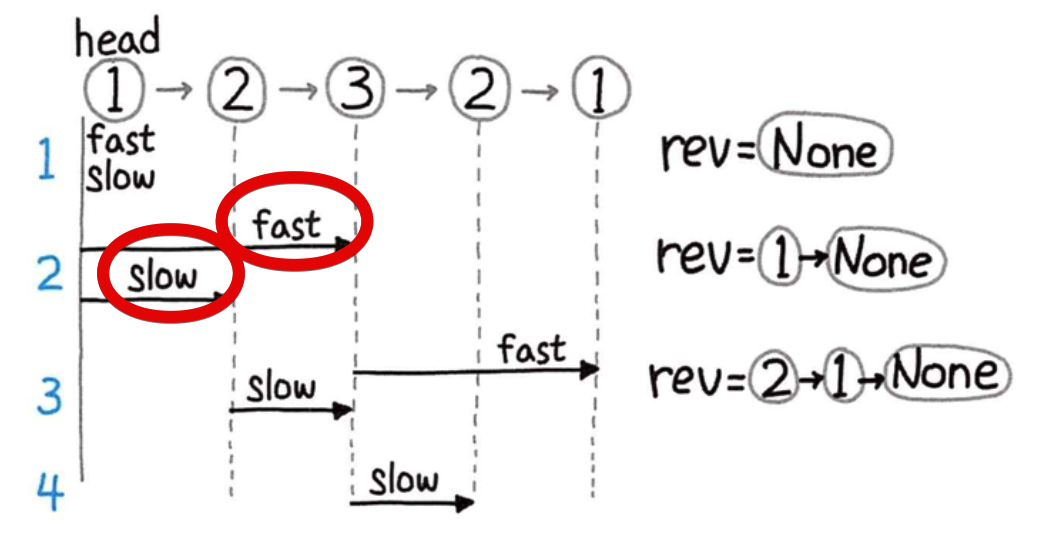

In [ ]:
from typing import List
import collections


class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = None


def is_palindrome3(head: ListNode) -> bool:
    rev = None
    slow = fast = head
    # 런너를 이용해 역순 연결 리스트 구성
    while fast and fast.next:
        fast = fast.next.next
        rev, rev.next, slow = slow, rev, slow.next
    if fast:
        slow = slow.next

    # 팰린드롬 여부 확인
    while rev and rev.val == slow.val:
        slow, rev = slow.next, rev.next
    return not rev


if __name__ == "__main__":
    list1 = ListNode(1)
    list2 = ListNode(2)
    list3 = ListNode(2)
    list4 = ListNode(1)
    head = list1
    list1.next = list2
    list2.next = list3
    list3.next = list4

    print(is_palindrome3(head))

True


In [ ]:
if __name__ == "__main__":
    list1 = ListNode(1)
    list2 = ListNode(2)
    list3 = ListNode(3)
    list4 = ListNode(2)
    list5 = ListNode(1)
    head = list1
    list1.next = list2
    list2.next = list3
    list3.next = list4
    list4.next = list5


    print(is_palindrome3(head))

True


### 런너 기법

런너(Runner)는 연결 리스트를 순회할 때 2개의 포인터를 동시에 사용하는 기법을 의미합니다.

한 포인터가 다른 포인터보다 앞서게 하여 병합 지점이나 중간 위치, 길이 등을 판별할 때 유용하게 사용할 수 있습니다.

2개의 포인터는 각각 빠른 런너와 느린 런너라고 부르는데, 대게 빠른 런너(포인터)는 두 칸씩 건너뛰고

느린 런너(포인터)는 한 칸씩 이동하게 됩니다.

이때 빠른 런너가 연결 리스트의 끝에 도달하면, 느린 런너는 정확히 연결리스트의 중간 지점을 가리키게 됩니다.

이와 같은 방식으로 중간 위치를 찾게되면, 여기부터 값을 비교하거나 뒤집기를 시도하는 등 여러 방면으로 활용할 수 있어 연결리스트 문제에서는 반드시 쓰이는 기법이기도 합니다.

In [ ]:
id(5)

94748034796160

In [ ]:
a = 5

In [ ]:
id(a)

94748034796160

In [ ]:
b = 5

In [ ]:
id(b)

94748034796160

In [ ]:
rev, rev.next, slow = slow, rev, slow.next

NameError: ignored

# 다중할당 & 런너 개념 질문하기!!

# 14. 두 정렬 리스트의 병합

정렬되어 있는 두 연결 리스트를 합쳐라.


In [ ]:
# input
input = [1, 2, 4], [1, 3, 4] # out = [1, 1, 2, 3, 4, 4]

### 풀이 1. 재귀 구조로 연결

정렬된 리스트라는 점이 중요하다.

병렬 정렬에서 마지막 조합 시 첫 번째 값부터 차례대로만 비교하면 한 번에 해결 되듯이, 이 또한 병합 정렬의 마지막 조합과 동일한 방식으로 첫 번째부터 비교하면서 리턴하면 쉽게 풀 수 있는 문제입니다.

In [5]:
from typing import List
 
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = None
 
def merge_two_lists(l1: ListNode, l2: ListNode) -> ListNode:
    # l1과 l2의 값을 비교해서 작은 값이 왼쪽에 오게 하고
    if (not l1) or (l2 and l1.val > l2.val): # 우선순위 : > , not l1, and, or
        l1, l2 = l2, l1 # 변수 스왑 (Swap)
 
    # next는 그 다음값이 엮이도록 재귀 호출
    if l1:
        l1.next = merge_two_lists(l1.next, l2)
    return l1
 
list1 = ListNode(1)
list2 = ListNode(2)
list3 = ListNode(4)
head1 = list1
list1.next = list2
list2.next = list3
 
list4 = ListNode(1)
list5 = ListNode(3)
list6 = ListNode(4)
head2 = list4
list4.next = list5
list5.next = list6
 
head = merge_two_lists(head1, head2)
while head:
  print(head.val, end="")
  if head.next:
    print("->", end="")
  head = head.next

1->1->2->3->4->4

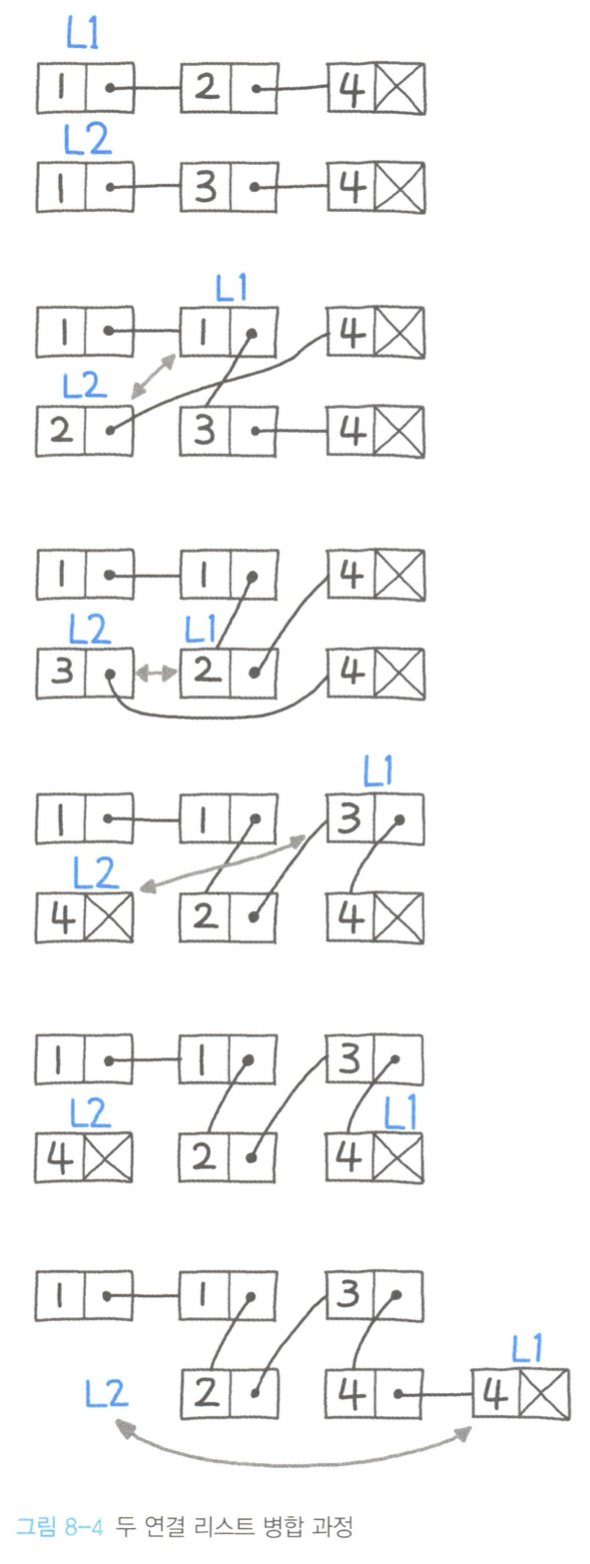

# 15. 연순 연결 리스트

연결리스트를 뒤집어라.

- 입력 : 1 -> 2 -> 3 -> 4 -> 5 -> Null

- 출력 : 5 -> 4 -> 3-> 2 -> 1 -> Null

### 풀이 1. 재귀 구조로 뒤집기

연결 리스트를 뒤집는 문제는 매우 일반적이면서도 활용도가 높은 문제로, 실무에서도 빈번하게 쓰입니다.

다음 노드 next 와 현재 노드 node를 파라미터로 지정한 함수를 계속해서 재귀 호출합니다.

node.nextdpsms 이전 prev 리스트를 계속 연결해주면서 node가 None이 될 때까지 재귀 호출하면 마지막에는 백트래킹 되면서 연결리스트가 거꾸로 연결됩니다.

여기서 맨 처음에 리턴된 prev는 뒤집힌 연결 리스트의 첫 번째 노드가 됩니다.

In [7]:
from typing import List
 
class ListNode(object):
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = None
 
def reverse_list(head):
  def reverse(node, prev=None):
    if not node:
      return prev # 맨 처음에 리턴된 prev는 뒤집힌 연결 리스트의 첫 번째 노드가 됩니다.
    next, node.next = node.next, prev # 다음 노드 next 와 현재 노드 node를 지정한 함수를 계속해서 재귀 호출 -> node.next에는 이전 prev 리스트를 계속 연결해주면서, node가 None이 될 때까지 재귀 호출
    return reverse(next, node)
    
  return reverse(head)
 
list1 = ListNode(1)
list2 = ListNode(2)
list3 = ListNode(3)
list4 = ListNode(4)
list5 = ListNode(5)
 
head = list1 # head = [1, 2, 3, 4, 5]
list1.next = list2
list2.next = list3
list3.next = list4
list4.next = list5
 
head = reverse_list(head)
 
while head:
  print(head.val, end="")
  if head.next:
    print("->", end="")
  head = head.next

5->4->3->2->1

### 풀이 2. 반복 구조로 뒤집기

마찬가지로, node.next를 이전 prev 리스트로 계속 연결하면서 끝날 때까지 반복합니다.

node가 None이 될 때 prev는 뒤집힌 연결 리스트의 첫 번쨰 노드가 됩니다.

next, node.next = node.next, prev로 다중 할당하는 부분은 재귀나 본복 양쪽 모두 동일합니다.

일부로 이름도 head가 node가 되도록 동일하게 맞추어줍니다.

반복 풀이의 경우 prev에 nodefmf, node에 next를 별도로 셋팅하며, 이를 이용해서 node가 None이 될 떄까지 계속 while 반복문을 돌게 합니다.

In [6]:
from typing import List
 
class ListNode(object):
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = None
 
def reverse_list(head):
  node, prev = head, None
 
  while node:
    next, node.next = node.next, prev
    prev, node = node, next
 
  return prev
 
list1 = ListNode(1)
list2 = ListNode(2)
list3 = ListNode(3)
list4 = ListNode(4)
list5 = ListNode(5)
 
head = list1
list1.next = list2
list2.next = list3
list3.next = list4
list4.next = list5
 
head = reverse_list(head)
 
while head:
  print(head.val, end="")
  if head.next:
    print("->", end="")
  head = head.next

5->4->3->2->1

# 16. 두 수의 덧셈

역순으로 저장된 연결 리스트의 숫자를 더하라.

- 입력 : (2 -> 4 -> 3) + (5 -> 6 -> 4)

- 출력 : (7 -> 0 -> 8)

- 설명 : 342 + 465 = 807

### 풀이 1. 자료형 변환



In [9]:
from typing import List


# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution:
    # 연결 리스트 뒤집기
    def reverseList(self, head: ListNode) -> ListNode:
        node, prev = head, None

        while node:
            next, node.next = node.next, prev
            prev, node = node, next

        return prev

    # 연결 리스트를 파이썬 리스트로 변환
    def toList(self, node: ListNode) -> List:
        list: List = []
        while node:
            list.append(node.val)
            node = node.next
        return list

    # 파이썬 리스트를 연결 리스트로 변환
    def toReversedLinkedList(self, result: str) -> ListNode:
        prev: ListNode = None
        for r in result:
            node = ListNode(r)
            node.next = prev
            prev = node

        return node

    # 두 연결 리스트의 덧셈
    def addTwoNumbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        a = self.toList(self.reverseList(l1))
        b = self.toList(self.reverseList(l2))

        resultStr = int(''.join(str(e) for e in a)) + \
                    int(''.join(str(e) for e in b))

        # 최종 계산 결과 연결 리스트 변환
        return self.toReversedLinkedList(str(resultStr))

### 풀이 2. 전가산기 구현

In [10]:
from typing import List
 
class ListNode(object):
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = None
 
def add_two_numbers(l1, l2):
  root = head = ListNode(0)
 
  carry = 0
  while l2 or l2 or carry:
    sum = 0
 
    if l1:
      sum += l1.val
      l1 = l1.next
    if l2:
      sum += l2.val
      l2 = l2.next
 
    carry, val = divmod(sum + carry, 10)
    head.next = ListNode(val)
    head = head.next
  
  return root.next

# 17. 페어의 노드 스왑

연결 리스트를 입력 받아 pair 단위로 스왑하라.

- 입력 : 1 -> 2 -> 3 -> 4

- 출력 : 2 -> 1 -> 4 -> 3

### 풀이 1. 값만 교환

직관적으로 노드의 구조에서 값만 변경하는 방법

In [17]:
from typing import List
 
class ListNode(object):
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = None
 
def swap_pairs(head):
  cur = head
 
  while cur and cur.next:
    cur.val, cur.next.val = cur.next.val, cur.val
    cur = cur.next.next
 
  return head
 
list1 = ListNode(1)
list2 = ListNode(2)
list3 = ListNode(3)
list4 = ListNode(4)
 
head = list1
list1.next = list2
list2.next = list3
list3.next = list4
 
head = swap_pairs(head)
 
while head:
  print(head.val, end="")
  if head.next:
    print("->", end="")
  head = head.next

2->1->4->3

### 풀이 2. 반복 구조로 스왑

In [18]:
from typing import List
 
class ListNode(object):
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = None
 
def swap_pairs(head):
  root = prev = ListNode(None)
  prev.next = head
  while head and head.next:
    # b가 a(head)를 가리키도록 할당
    b = head.next
    head.next = b.next
    b.next = head
 
    # prev가 b를 가리키도록 할당
    prev.next = b
 
    # 다음번 비교를 위해 이동
    head = head.next
    prev = prev.next.next
 
  return root.next
 
list1 = ListNode(1)
list2 = ListNode(2)
list3 = ListNode(3)
list4 = ListNode(4)
 
head = list1
list1.next = list2
list2.next = list3
list3.next = list4
 
head = swap_pairs(head)
 
while head:
  print(head.val, end="")
  if head.next:
    print("->", end="")
  head = head.next

2->1->4->3

### 풀이 3. 재귀 구조로 스왑

In [24]:
from typing import List
 
class ListNode(object):
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = None
 
def swap_pairs(head):
  if head and head.next:
    p = head.next
    # 스왑된 값 리턴 받음
    head.next = swap_pairs(p.next) # self 지워야함.
    p.next = head
    return p
  return head
 
list1 = ListNode(1)
list2 = ListNode(2)
list3 = ListNode(3)
list4 = ListNode(4)
 
head = list1 # []
list1.next = list2
list2.next = list3
list3.next = list4
 
head = swap_pairs(head) # 왜 안 되는 것인지 모르겠음..
 
while head:
  print(head.val, end="")
  if head.next:
    print("->", end="")
  head = head.next

2->1->4->3

# 18. 홀짝 연결 리스트

연결 리스트를 홀수 노드 다음에 짝수 노드가 오도록 재구성하라. 공간복잡도 O(1), 시간복잡도 O(n)에 풀이하라.

- 입력 : 1->2->3->4->5->NULL

- 출력 : 1->3->5->2->4->NULL
 
- 입력 : 2->1->3->5->6->4->7->NULL

- 출력 : 2->3->6->7->1->5->4->NULL

### 풀이 1. 반복 구조로 홀짝 노드 처리

In [20]:
from typing import List
 
class ListNode(object):
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = None
 
def odd_even_list(head):
  if head is None:
    return
  
  odd = head
  even = head.next
  even_head = head.next
 
  while even and even.next:
    odd.next, even.next = odd.next.next, even.next.next
    odd, even = odd.next, even.next
 
  odd.next = even_head
  return head
 
list1 = ListNode(1)
list2 = ListNode(2)
list3 = ListNode(3)
list4 = ListNode(4)
list5 = ListNode(5)
 
head = list1
list1.next = list2
list2.next = list3
list3.next = list4
list4.next = list5
 
head = odd_even_list(head)
 
while head:
  print(head.val, end="")
  if head.next:
    print("->", end="")
  head = head.next

1->3->5->2->4

# 19. 역순 연결 리스트 2

인덱스 m에서 n까지를 역순으로 만들어라. 인덱스 m은 1부터 시작한다.

- 입력 : 1->2->3->4->5->6->NULL, m = 2, n = 5

- 출력 : 1->5->4->3->2->6->NULL

### 풀이 1. 반복 구조로 노드 뒤집기

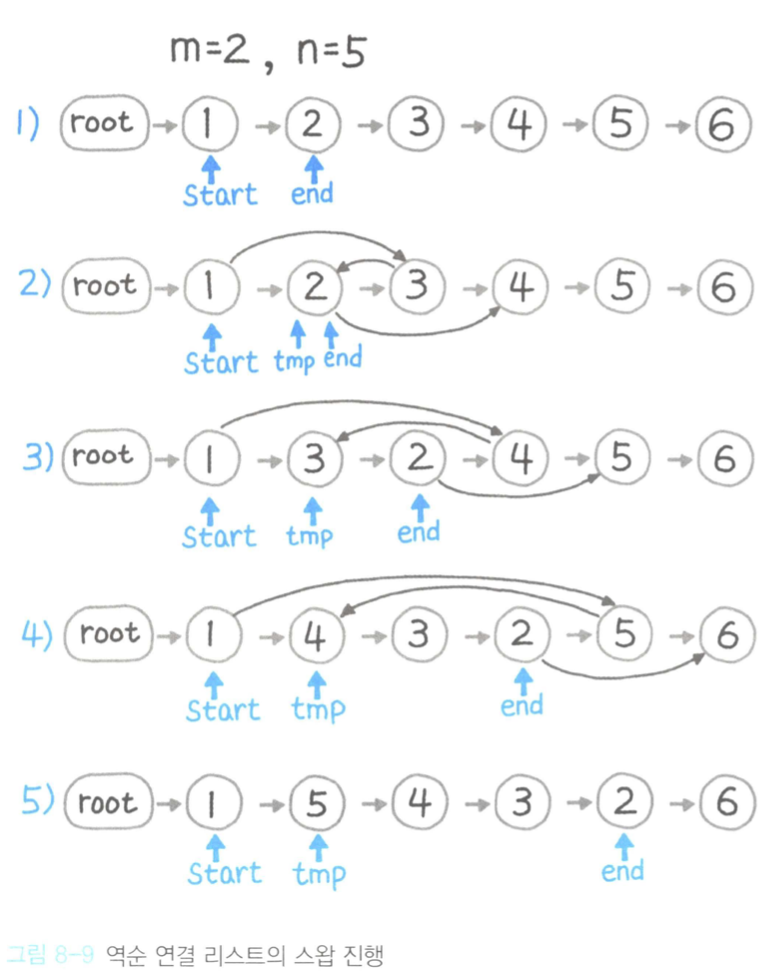

In [25]:
from typing import List
 
class ListNode(object):
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = None
 
def odd_even_list(head, m, n):
  # 예외 처리
  if not head or m == n:
    return head
 
  root = start = ListNode(None) # 1. start는 변경이 필요한 2의 바로 앞 지점인 1을 가르키게 함으로써
  root.next = head # 3. head 는 1인데, 그보다 더 앞에 있는 root를 만들어서 head 보다 이전에 위치시켜줍니다. 
 
  for _ in range(m - 1):
    start = start.next
  end = start.next # 2. end는 start.next인 2로 지정해줍니다.
 
  for _ in range(n - m):
    tmp, start.next, end.next = start.next, end.next, end.next.next
    start.next.next = tmp
  return root.next # 4. 최종결과로 root.next를 리턴해줍니다.

  # 1, 2의 과정을 통해서 1과 2로 마지막까지 유지가 되며, start와 end를 기준으로 위 그림처럼 역순으로 뒤집힙니다.
 
list1 = ListNode(1)
list2 = ListNode(2)
list3 = ListNode(3)
list4 = ListNode(4)
list5 = ListNode(5)
 
head = list1
list1.next = list2
list2.next = list3
list3.next = list4
list4.next = list5
 
m = 1
n = 4
head = odd_even_list(head, m, n)
 
while head:
  print(head.val, end="")
  if head.next:
    print("->", end="")
  head = head.next

# root 사용이유? m 값이 1이 될 때, 코드 진행이 되기 위해

4->3->2->1->5